# Lab 5: Numerical differentiation

In this lab we will investigate three methods of increasing sophistication to estimate the derivative of a mathematical function. We'll also investigate how to choose the parameters of these methods to get accurate results.

Remember to consult the cheat sheet on QM+ if you're uncertain about the maths involved.

## Coding the three methods

Recall that the simplest possible algorithm, the *forward difference method*, is very similar to the definition of differentiation:

$$
f'(x) = \lim_{x\rightarrow 0}\frac{f(x + h) - f(x)}{h}.
$$

We simply choose a small step $h$ and write

$$
f'(x, h)_\text{FD} = \frac{f(x + h) - f(x)}{h}.
$$

**Write a function `FD(f, x, h)` to return the derivative of some function `f` at `x` using a step size of `h`.**

In [10]:

def FD(f, x0, h):
    b=(f(x0+h))-(f(x0))/(h)
    return b
    
    
    #"""Docstring goes here"""
    # Your code goes here
    
    
   

**Check your function** using the sine function (recall that you can `from numpy import sin`) at $x = 0$ and various step sizes.

In [11]:
from numpy import sin 
FD(sin,0,0.5)


0.47942553860420301

A more sophisticated algorithm is the *central difference* method, which as we have seen in class eliminates first-order error, so that the error is proportional to $h^2$ rather than $h$. Recall that this method sets

$$
f'(x, h)_\text{CD} = \frac{f(x + \tfrac12h) - f(x - \tfrac12h)}{h}.
$$

**Write a function `CD(f, x, h)` in the same way. Again, you may want to check your function works as expected before proceeding.**

In [12]:
def CD(f, x, h):
    c=(f(x+(0.5*h))-f(x-(0.5*h)))/(h)
    return c
from numpy import sin 
CD(sin,0,0.5)

0.98961583701809175

The final method we discussed was the *extrapolated difference* method, in which we combine two iterations of the central difference algorithm to give error proportional to $h^4$:

$$
f'(x, h)_\text{ED} = \tfrac13\big(4f'(x, \tfrac12h)_\text{CD} - f'(x, h)_\text{CD}\big).
$$

**Once again, write a function `ED(f, x, h)` to use this method. It will be easiest to have your function call the `CD` function you've already written.**

In [13]:
def ED(f, x, h):
    d=(1/3)*((4*CD(f,x,h/2)))-CD(f,x,h)
    return d
from numpy import sin 
ED(sin,0,0.5)

0.34024798575767023

▶ **CHECKPOINT 1**

## Testing the algorithms

Let's test these three algorithms using functions that are easy to differentiate by hand. Specifically, we'll differentiate the functions $\cos(x)$ and $e^x$ at $x = 0.1$, $1$ and $100$.

Initially, you should **pick one function and one point to test it at** from these lists. The following code outline, when complete, will calculate the derivative of a test function at some point using the FD method for a range of step sizes $h$. It will then calculate and print out the relative error $\epsilon$, where
$$
\epsilon = \frac{f'(x)_\text{calculated} - f'(x)_\text{exact}}{f'(x)_\text{exact}},
$$
and finally plot $|\epsilon|$ against $h$ on a log-log plot.

**Complete this code to perform as described.**

▶ **CHECKPOINT 2**

**Then modify it to include the CD and ED algorithms, all plotted on the one figure.**

0.1 -4.94942693726 4.88187474864
0.01 -53.4983698654 62.5772009152
0.001 -539.762845303 640.451523639
0.0001 -5402.48284053 6419.28416673
1e-05 -54029.6902929 64207.6195108
1e-06 -540301.765567 642090.973843
1e-07 -5403022.51838 6420924.51725
1e-08 -54030230.0465 64209259.9513
1e-09 -540302305.328 642092614.292
1e-10 -5403023058.14 6420926157.7
1e-11 -54030230586.3 64209261591.8
1e-12 -540302305868.0 642092615933.0
1e-13 -5.40302305868e+12 6.42092615934e+12
1e-14 -5.40302305868e+13 6.42092615934e+13
1e-15 -5.40302305868e+14 6.42092615934e+14
1e-16 -5.40302305868e+15 6.42092615934e+15
1e-17 -5.40302305868e+16 6.42092615934e+16


<IPython.core.display.Javascript object>


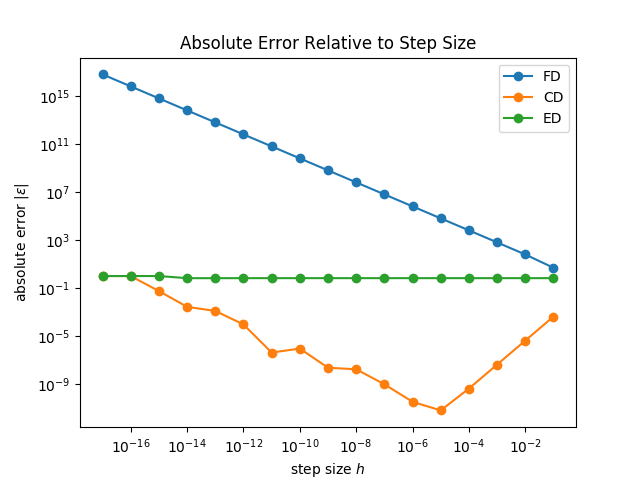

In [20]:
from pylab import cos, sin, exp, logspace, loglog, xlabel, ylabel, title, legend
%matplotlib notebook

                                                     # where will we evaluate this function?
test_f = cos                                                  # choose an appropriate function here
x0 = 1 
fx0p =-sin(1)                                                 # put the true value of the derivative of test_f at x0 here

hh = logspace(-1, -17, 17)                                    # same syntax as linspace: this gives us a range from 10^-1 to 10^-17 with 17 points.

fd_errors = []
cd_errors= []
ed_errors= []
                                                              # We will collect the epsilon values for the FD method in this list. 
                                                              # You may like to set up similar lists for other methods.

for h in hh:
    fd_estimate = FD(test_f, x0, h)                           # calculate the estimated derivative with the FD method here.
                                                              # And perhaps for other methods...
    cd_estimate = CD(test_f, x0, h)
    ed_estimate = ED(test_f, x0, h)
    
    
    fd_error = (fd_estimate-fx0p)/(fx0p)                      # calculate epsilon for the FD method here.
                                                              # And perhaps for other methods...
    cd_error=(cd_estimate-fx0p)/(fx0p)
    ed_error=(ed_estimate-fx0p)/(fx0p)
    
    print(h, fd_estimate, fd_error)
    
                                                              #print("{:5.0e} {:10.6f} {:10.6f}".format(h, fd_estimate, fd_error))
                                                              # Modify this as needed to print out results for other methods.
    
    fd_errors.append(abs(fd_error))
    cd_errors.append(abs(cd_error))
    ed_errors.append(abs(ed_error))
                                                              # We append the absolute value of epsilon to our list of errors.

loglog(hh, fd_errors, 'o-', label="FD")                       # Same syntax as plot. The label is used in the legend.
loglog(hh, cd_errors, 'o-', label="CD")
loglog(hh, ed_errors, 'o-', label="ED")
xlabel('step size $h$')                                       # Note that we can include LaTeX-style maths within dollar signs.
ylabel('absolute error $|\epsilon|$')
title('Absolute Error Relative to Step Size')                 # Include an appropriate string for a graph title here.
legend()                                                                   #http://hplgit.github.io/prog4comp/doc/pub/p4c-sphinx-Python/._pylight007.html

**Where is each algorithm most accurate? Can you identify which sorts of error occur elsewhere?**

▶ **CHECKPOINT 3**

## Extension: *Imaginary step* algorithm

The *imaginary step* algorithm is

$$
f'(x, h)_\text{IS} = \frac{\mathrm{Im}\{x + \mathrm{i}h\}}{h}
$$

where $\mathrm{Im}$ represents the imaginary part of a number; this only works if $f$ is a *real* function. This looks extraordinarily bizarre on the face of it, but can be shown to work using Taylor series in much the same way as we did in class for the other algorithms.

**Code a function `IS(f, x, h)` to calculate the derivative using this method. Is it more or less accurate than the other methods we have discussed? Can you see why?**

*Hint*: The number $2 + 3\mathrm{i}$ is written in Python as `2 + 3j`. If `z` is a complex number in Python, its imaginary part is `z.imag`. 

For more information about this algorithm, you might like to see [this informal blog post](https://sinews.siam.org/Details-Page/differentiation-without-a-difference) or a [more formal paper](http://mdolab.engin.umich.edu/sites/default/files/Martins2003CSD.pdf) (section 2.1 is most relevant for our purposes).

In [17]:
def IS(f, x, h):
    return (Im{x+hj})/(h)
from numpy import sin 
IS(sin,0,0.5)

#Extrapolated difference ED is the most accurate as the error is h**4 meaning it is the most precise, any further will be less precise due to machine precision 

SyntaxError: invalid syntax (<ipython-input-17-2c1123b9d445>, line 2)